##**Part 1: Getting started**

We are going to work with a forest cover dataset: http://odds.cs.stonybrook.edu/forestcovercovertype-dataset/. This dataset contains 10 quantitative features that contain cartographic information.

Load the dataset in CSV file using Pandas. The dataset is called `vehicle_insurance.csv`. Print out the first few columns of the dataset.


In [ ]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=f3149160287e19a07ac11f2386904cf8cd4f3789961adf20f54b97fe30bacfd1
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [ ]:
import wget

wget.download('https://github.com/APS1070-W23/datasets/raw/main/forest_data_all.tar.gz','forest_data_all.tar.gz')

'forest_data_all.tar.gz'

In [ ]:
!tar -zxvf forest_data_all.tar.gz

forest_data_all.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('forest_data_all.csv')

In [ ]:

df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Anomaly
count,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000,286048.000000
mean,2914.242610,151.917224,13.598309,278.255251,45.839107,2414.978643,213.983685,225.246605,142.680092,2155.583857,0.009603
std,197.987324,107.488551,7.138464,210.458091,57.504597,1618.090012,24.955931,18.551910,36.501454,1423.976520,0.097525
min,1988.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2788.000000,60.000000,8.000000,120.000000,8.000000,1123.000000,201.000000,215.000000,120.000000,1165.000000,0.000000
50%,2933.000000,126.000000,13.000000,240.000000,30.000000,2016.000000,219.000000,227.000000,142.000000,1832.000000,0.000000
75%,3041.000000,241.000000,18.000000,390.000000,67.000000,3386.000000,232.000000,239.000000,167.000000,2647.000000,0.000000
max,3433.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,1.000000


In [ ]:
np.mean(df.Anomaly)

0.009603283365029646

It's important to know how many examples we have for each class when we work with a new dataset.


In [ ]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Anomaly
0,2804,139,9,268,65,3180,234,238,135,6121,0
1,2785,155,18,242,118,3090,238,238,122,6211,0
2,2579,132,6,300,-15,67,230,237,140,6031,0
3,2886,151,11,371,26,5253,234,240,136,4051,0
4,2742,134,22,150,69,3215,248,224,92,6091,0
...,...,...,...,...,...,...,...,...,...,...,...
286043,2617,29,13,390,128,2081,215,211,130,592,0
286044,2614,21,13,379,125,2051,211,212,135,618,0
286045,2612,17,13,371,123,2021,208,211,138,644,0
286046,2610,16,14,365,110,1991,208,211,138,671,0


In [ ]:
class1 = np.sum(df.Anomaly == 0)
class2 = np.sum(df.Anomaly == 1)
percentageClass1 = class1/len(df.Anomaly)
percentageClass2 = class2/len(df.Anomaly)
print ("Percentage for class 0: ", percentageClass1 * 100, "%")
print ("Percentage for class 1: ", percentageClass2 * 100, "%")

Percentage for class 0:  99.03967166349703 %
Percentage for class 1:  0.9603283365029646 %


Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40.

Make sure to separate out the column corresponding to the targets.

In [ ]:
df1 = pd.read_csv('forest_data_all.csv')

In [ ]:
df1.drop(['Anomaly'], inplace=True, axis=1)

In [ ]:
### Split the data  ###
dfTarget = df.Anomaly

X_train, X_test, y_train, y_test = train_test_split(df1, dfTarget, test_size=0.15, random_state=40)
#X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0
X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=20/65, random_state=40)



Now, let's take a look at the difference in distribution for some variables between anomalous and non-anomalous forests:

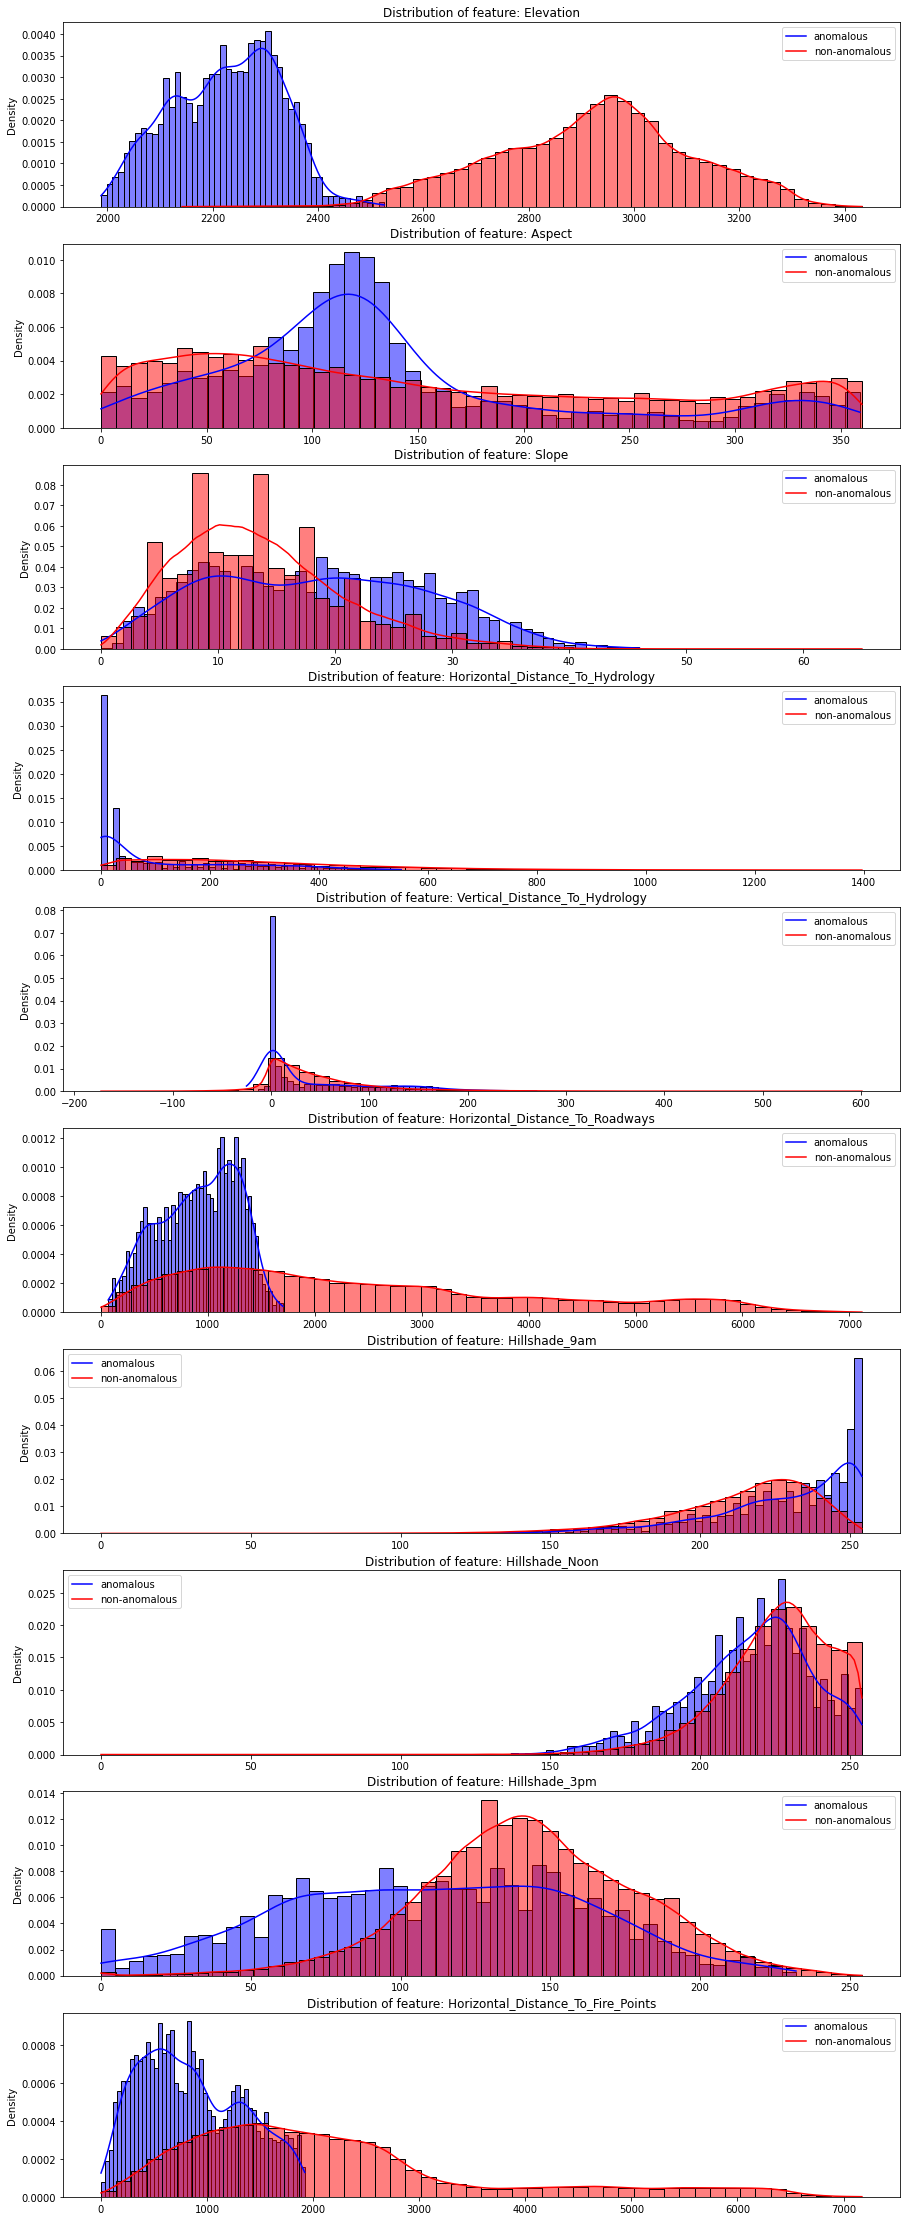

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if not 'id' in f and not 'Anomaly' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['anomalous', 'non-anomalous'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

In [ ]:
print(features)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


## **Part 2: One Gaussian model with Single feature:**
We'll start by making a prediction using **a single feature of our dataset at a time**.

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**

**b. Fitting based on class:**



In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
trainingAUC = np.array([])
validationAUC = np.array([])
for f, feat1 in enumerate(features):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

  X_trainingCurrent = np.array([X_training[features[f]]])[0].reshape(-1,1)
  gm.fit(X_trainingCurrent)
  st = gm.score_samples(X_trainingCurrent)
  fpr_st, tpr_st, _ = roc_curve(y_training, -1 * st)
  aucSt = auc(fpr_st, tpr_st)
  trainingAUC = np.append(trainingAUC,aucSt)

  X_validationCurrent = np.array([X_validation[features[f]]])[0].reshape(-1,1)
  gm.fit(X_validationCurrent)
  sv = gm.score_samples(X_validationCurrent)
  fpr_sv, tpr_sv, _ = roc_curve(y_validation, -1 * sv)
  aucSv = auc(fpr_sv, tpr_sv)
  validationAUC = np.append(validationAUC,aucSv)

In [ ]:
dfBestAUC = pd.DataFrame({'features_name': features,'trainingAUC': trainingAUC, 'validationAUC': validationAUC})

In [ ]:
dfBestAUC.sort_values(by = 'validationAUC', ascending = False)

,features_name,trainingAUC,validationAUC
0,Elevation,0.999367,0.999234
9,Horizontal_Distance_To_Fire_Points,0.673898,0.665020
8,Hillshade_3pm,0.663698,0.655739
2,Slope,0.641710,0.655542
3,Horizontal_Distance_To_Hydrology,0.655777,0.647704
4,Vertical_Distance_To_Hydrology,0.651317,0.638191
6,Hillshade_9am,0.643829,0.626415
5,Horizontal_Distance_To_Roadways,0.610349,0.617845
7,Hillshade_Noon,0.531753,0.551937
1,Aspect,0.380998,0.356748


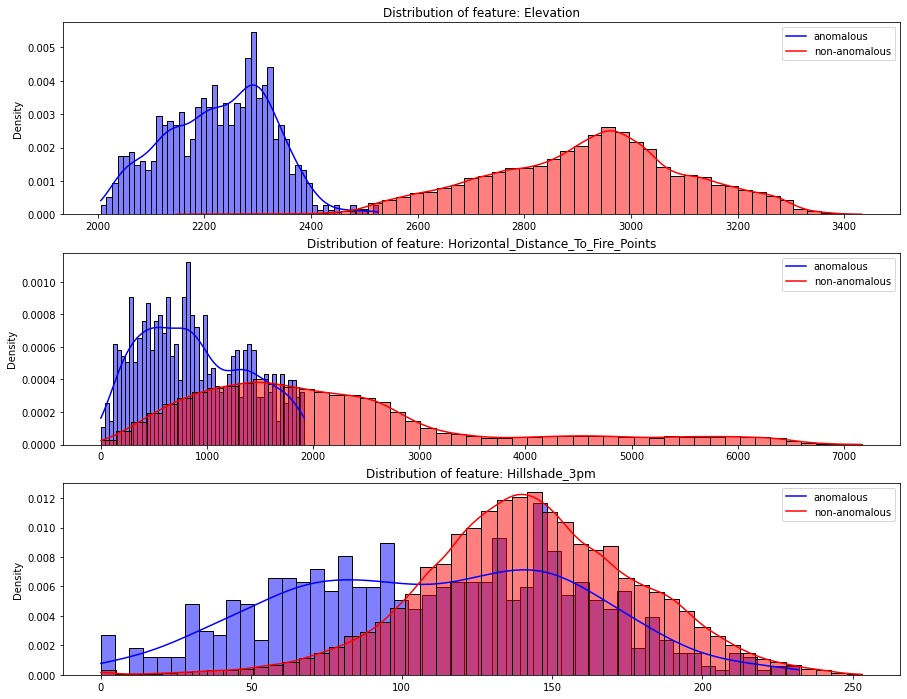

In [ ]:
bestThreeFeatureList = ['Elevation','Horizontal_Distance_To_Fire_Points','Hillshade_3pm']
nplots=np.size(bestThreeFeatureList)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(bestThreeFeatureList):
    ax = plt.subplot(gs[i])
    sns.histplot(X_validation[feat][y_validation==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_validation[feat][y_validation==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['anomalous', 'non-anomalous'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

In [ ]:
bestTrList = np.array([])
bestF1List = np.array([])
bestThreeFeatureList = ['Elevation','Horizontal_Distance_To_Fire_Points','Hillshade_3pm']
for g, btf in enumerate(bestThreeFeatureList):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  X_validationBTF = np.array([X_validation[bestThreeFeatureList[g]]])[0].reshape(-1,1)
  gm.fit(X_validationBTF)
  btfsv = gm.score_samples(X_validationBTF)
  trList = np.array([])
  f1List = np.array([])


  for i in range(0,len(btfsv),50):
   tr = sorted(btfsv)[i] #We sort the points by probability
   trList = np.append(trList,tr)
   f1 = f1_score(y_validation, btfsv< tr)
   f1List = np.append(f1List,f1)

  bestF1temp = np.max(f1List)
  bestIndex = np.argwhere(f1List == bestF1temp)
  bestTr = trList[bestIndex[0]]

  bestF1 = f1_score(y_validation, btfsv< bestTr)

  bestTrList = np.append(bestTrList,bestTr)
  bestF1List = np.append(bestF1List,bestF1)
  print("Feature:",btf)
  print("Best threshold:",bestTr)
  print("Best f1 score:",bestF1)
  print("=========")
print(bestTrList)

Feature: Elevation
Best threshold: [-9.83826398]
Best f1 score: 0.8782664117272149
Feature: Horizontal_Distance_To_Fire_Points
Best threshold: [-8.58533788]
Best f1 score: 0.034957395674022285
Feature: Hillshade_3pm
Best threshold: [-7.95809815]
Best f1 score: 0.10259579728059333
[-9.83826398 -8.58533788 -7.95809815]


In [ ]:
print('Training Set')
reportListf1 = []
reportListpr = []
reportListrc = []

for p, btf1 in enumerate(bestThreeFeatureList):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  X_trainingBTF1 = np.array([X_training[bestThreeFeatureList[p]]])[0].reshape(-1,1)
  gm.fit(X_trainingBTF1)
  btfst1 = gm.score_samples(X_trainingBTF1)
  prt = precision_score(y_training, btfst1 < bestTrList[p])
  rct = recall_score(y_training, btfst1 < bestTrList[p])
  f1t = f1_score(y_training, btfst1 < bestTrList[p])
  reportListf1.append(f1t)
  reportListpr.append(prt)
  reportListrc.append(rct)

dfReportT = pd.DataFrame({'features_name': bestThreeFeatureList,'Best threshold': bestTrList,'F1': reportListf1, 'Precision': reportListpr, 'Recall': reportListrc})

Training Set


In [ ]:
dfReportT

,features_name,Best threshold,F1,Precision,Recall
0,Elevation,-9.838264,0.885274,0.819767,0.962159
1,Horizontal_Distance_To_Fire_Points,-8.585338,0.034964,0.018038,0.566998
2,Hillshade_3pm,-7.958098,0.090985,0.082699,0.101117


In [ ]:
reportListf1V = []
reportListprV = []
reportListrcV = []

print('Validation Set')
for p, btf1 in enumerate(bestThreeFeatureList):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  X_validationBTF1 = np.array([X_validation[bestThreeFeatureList[p]]])[0].reshape(-1,1)
  gm.fit(X_validationBTF1)
  btfsv1 = gm.score_samples(X_validationBTF1)
  prv = precision_score(y_validation, btfsv1 < bestTrList[p])
  rcv = recall_score(y_validation, btfsv1 < bestTrList[p])
  f1v = f1_score(y_validation, btfsv1 < bestTrList[p])
  reportListf1V.append(f1v)
  reportListprV.append(prv)
  reportListrcV.append(rcv)

dfReportV = pd.DataFrame({'features_name': bestThreeFeatureList,'Best threshold': bestTrList,'F1': reportListf1V, 'Precision': reportListprV, 'Recall': reportListrcV})

Validation Set


In [ ]:
dfReportV

,features_name,Best threshold,F1,Precision,Recall
0,Elevation,-9.838264,0.878266,0.811543,0.956944
1,Horizontal_Distance_To_Fire_Points,-8.585338,0.034957,0.018046,0.555556
2,Hillshade_3pm,-7.958098,0.102596,0.092428,0.115278


In [ ]:
# Training set
bestTrListPart2b = np.array([])
bestF1ListPart2b = np.array([])
aucListPart2b = np.array([])
prListPart2b = np.array([])
rcListPart2b = np.array([])

xPart2bTBothClass = []
xPart2bT1BothClass = np.array(X_training['Elevation']).reshape(-1,1)
xPart2bT2BothClass = np.array(X_training['Horizontal_Distance_To_Fire_Points']).reshape(-1,1)
xPart2bT3BothClass = np.array(X_training['Hillshade_3pm']).reshape(-1,1)
xPart2bTBothClass.append(xPart2bT1BothClass)
xPart2bTBothClass.append(xPart2bT2BothClass)
xPart2bTBothClass.append(xPart2bT3BothClass)


xPart2bTNoAnomalous = []
xPart2bT1NoAnomalous = np.array(X_training['Elevation'][y_training==0]).reshape(-1,1)
xPart2bT2NoAnomalous = np.array(X_training['Horizontal_Distance_To_Fire_Points'][y_training==0]).reshape(-1,1)
xPart2bT3NoAnomalous = np.array(X_training['Hillshade_3pm'][y_training==0]).reshape(-1,1)
xPart2bTNoAnomalous.append(xPart2bT1NoAnomalous)
xPart2bTNoAnomalous.append(xPart2bT2NoAnomalous)
xPart2bTNoAnomalous.append(xPart2bT3NoAnomalous)

for i in range(len(xPart2bTNoAnomalous)):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  gm.fit(xPart2bTNoAnomalous[i])
  stPart2bT = gm.score_samples(xPart2bTBothClass[i])
  fpr_stPart2bT, tpr_stPart2bT, _ = roc_curve(y_training, -1 * stPart2bT)
  aucStPart2bT = auc(fpr_stPart2bT, tpr_stPart2bT)

  aucListPart2b = np.append(aucListPart2b,aucStPart2bT)

  trListPart2b = np.array([])
  f1ListPart2b = np.array([])

  for j in range(1,len(stPart2bT),50):
    trPart2b = sorted(stPart2bT)[j] #We sort the points by probability
    trListPart2b = np.append(trListPart2b,trPart2b)
    f1Part2b = f1_score(y_training, stPart2bT< trPart2b)
    f1ListPart2b = np.append(f1ListPart2b,f1Part2b)

  bestF1Part2btemp = np.max(f1ListPart2b)
  bestIndexPart2b = np.argwhere(f1ListPart2b == bestF1Part2btemp)
  bestTrPart2b = trListPart2b[bestIndexPart2b[0]]

  bestF1Part2b = f1_score(y_training, stPart2bT< bestTrPart2b)

  bestTrListPart2b = np.append(bestTrListPart2b,bestTrPart2b)
  bestF1ListPart2b = np.append(bestF1ListPart2b,bestF1Part2b)

  prPart2b = precision_score(y_training, stPart2bT < bestTrPart2b)
  prListPart2b = np.append(prListPart2b,prPart2b)

  rcPart2b = recall_score(y_training, stPart2bT < bestTrPart2b)
  rcListPart2b = np.append(rcListPart2b,rcPart2b)


dfReport2bT = pd.DataFrame({'features_name': bestThreeFeatureList,'AUC': aucListPart2b,'Best threshold': bestTrListPart2b,'F1': bestF1ListPart2b, 'Precision': prListPart2b, 'Recall': rcListPart2b})


In [ ]:
dfReport2bT

,features_name,AUC,Best threshold,F1,Precision,Recall
0,Elevation,0.999377,-10.437960,0.885293,0.828556,0.950372
1,Horizontal_Distance_To_Fire_Points,0.676205,-8.542105,0.035244,0.018133,0.625310
2,Hillshade_3pm,0.664495,-8.307788,0.096294,0.098382,0.094293


In [ ]:
# Validation set
bestTrListPart2bV = np.array([])
bestF1ListPart2bV = np.array([])
aucListPart2bV = np.array([])
prListPart2bV = np.array([])
rcListPart2bV = np.array([])

xPart2bVBothClass = []
xPart2bV1BothClass = np.array(X_validation['Elevation']).reshape(-1,1)
xPart2bV2BothClass = np.array(X_validation['Horizontal_Distance_To_Fire_Points']).reshape(-1,1)
xPart2bV3BothClass = np.array(X_validation['Hillshade_3pm']).reshape(-1,1)
xPart2bVBothClass.append(xPart2bV1BothClass)
xPart2bVBothClass.append(xPart2bV2BothClass)
xPart2bVBothClass.append(xPart2bV3BothClass)


xPart2bVNoAnomalous = []
xPart2bV1NoAnomalous = np.array(X_validation['Elevation'][y_validation==0]).reshape(-1,1)
xPart2bV2NoAnomalous = np.array(X_validation['Horizontal_Distance_To_Fire_Points'][y_validation==0]).reshape(-1,1)
xPart2bV3NoAnomalous = np.array(X_validation['Hillshade_3pm'][y_validation==0]).reshape(-1,1)
xPart2bVNoAnomalous.append(xPart2bV1NoAnomalous)
xPart2bVNoAnomalous.append(xPart2bV2NoAnomalous)
xPart2bVNoAnomalous.append(xPart2bV3NoAnomalous)

for i in range(len(xPart2bTNoAnomalous)):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  gm.fit(xPart2bVNoAnomalous[i])
  stPart2bV = gm.score_samples(xPart2bVBothClass[i])
  fpr_stPart2bV, tpr_stPart2bV, _ = roc_curve(y_validation, -1 * stPart2bV)
  aucStPart2bV = auc(fpr_stPart2bV, tpr_stPart2bV)

  aucListPart2bV = np.append(aucListPart2bV,aucStPart2bV)

  trListPart2bV = np.array([])
  f1ListPart2bV = np.array([])

  for j in range(1,len(stPart2bV),50):
    trPart2bV = sorted(stPart2bV)[j] #We sort the points by probability
    trListPart2bV = np.append(trListPart2bV,trPart2bV)
    f1Part2bV = f1_score(y_validation, stPart2bV< trPart2bV)
    f1ListPart2bV = np.append(f1ListPart2bV,f1Part2bV)

  bestF1Part2bVtemp = np.max(f1ListPart2bV)
  bestIndexPart2bV = np.argwhere(f1ListPart2bV == bestF1Part2bVtemp)
  bestTrPart2bV = trListPart2bV[bestIndexPart2bV[0]]

  bestF1Part2bV = f1_score(y_validation, stPart2bV< bestTrPart2bV)

  bestTrListPart2bV = np.append(bestTrListPart2bV,bestTrPart2bV)
  bestF1ListPart2bV = np.append(bestF1ListPart2bV,bestF1Part2bV)

  prPart2bV = precision_score(y_validation, stPart2bV < bestTrPart2bV)
  prListPart2bV = np.append(prListPart2bV,prPart2bV)

  rcPart2bV = recall_score(y_validation, stPart2bV < bestTrPart2bV)
  rcListPart2bV = np.append(rcListPart2bV,rcPart2bV)


dfReport2bV = pd.DataFrame({'features_name': bestThreeFeatureList,'AUC': aucListPart2bV,'Best threshold': bestTrListPart2bV,'F1': bestF1ListPart2bV, 'Precision': prListPart2bV, 'Recall': rcListPart2bV})



In [ ]:
dfReport2bV

,features_name,AUC,Best threshold,F1,Precision,Recall
0,Elevation,0.999249,-10.317128,0.877148,0.809636,0.956944
1,Horizontal_Distance_To_Fire_Points,0.667337,-8.606440,0.035119,0.018146,0.543056
2,Hillshade_3pm,0.655739,-7.981948,0.102596,0.092428,0.115278


## **Part 3: One Gaussian model with multiple features: **
This part is similar to Part 2, but here we will pick multiple features and set the number of components

 1. Pick two features (say, f1 and f2).
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis).
 3. On the scatter plot color the training set based on their class (non-anomalous blue and anomalous red).
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on non-anomalous forests).
 5. Fit your Gaussian model on the training set (all samples).
 6. Compute AUC on both training and validation sets
 7. Pick 3 new pair of features and repeat steps 2 to 6.
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)
 9. Find a threshold to maximize your F1 Score on the validation set.
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial)




In [ ]:
### YOUR CODE HERE ###
xPart3 = []
xPart3.append(np.array(X_training['Elevation']))
xPart3.append(np.array(X_training['Horizontal_Distance_To_Fire_Points']))
xPart3V = []
xPart3V.append(np.array(X_validation['Elevation']))
xPart3V.append(np.array(X_validation['Horizontal_Distance_To_Fire_Points']))

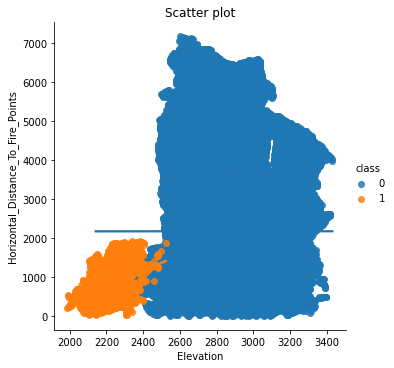

In [ ]:
dfxPart3 = pd.DataFrame({'Elevation': xPart3[0],'Horizontal_Distance_To_Fire_Points': xPart3[1],'class': y_training})
sns.lmplot(data=dfxPart3, x="Elevation", y="Horizontal_Distance_To_Fire_Points", hue="class").set(title='Scatter plot')

In [ ]:
xPart3rshape = []
x1 = xPart3[0]
x2 = xPart3[1]
for i in range(len(xPart3[0])):
  xPart3rshape.append(np.array([x1[i],x2[i]]))
print(x1[0])
print(x2[0])
print(xPart3rshape[0])

xPart3rshapeV = []
x1v = xPart3V[0]
x2v = xPart3V[1]
for i in range(len(xPart3V[0])):
  xPart3rshapeV.append(np.array([x1v[i],x2v[i]]))
print(x1v[0])
print(x2v[0])
print(xPart3rshapeV[0])

3128
2520
[3128 2520]
2831
2525
[2831 2525]


In [ ]:
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(xPart3rshape)
stPart3 = gm.score_samples(xPart3rshape)
fpr_stPart3, tpr_stPart3, _ = roc_curve(y_training, -1 * stPart3)
aucStPart3 = auc(fpr_stPart3, tpr_stPart3)

gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(xPart3rshapeV)
stPart3V = gm.score_samples(xPart3rshapeV)
fpr_stPart3V, tpr_stPart3V, _ = roc_curve(y_validation, -1 * stPart3V)
aucStPart3V = auc(fpr_stPart3V, tpr_stPart3V)

print("FeatureS: Elevation, Horizontal_Distance_To_Fire_Points")
print("X_training AUC:",aucStPart3)
print("X_validation AUC:",aucStPart3V)

FeatureS: Elevation, Horizontal_Distance_To_Fire_Points
X_training AUC: 0.9948724044964925
X_validation AUC: 0.9948247753948866


In [ ]:
#new pair
def pairAUC (f1 , f2):
  xPart31 = []
  xPart31.append(np.array(X_training[f1]))
  xPart31.append(np.array(X_training[f2]))
  xPart3V1 = []
  xPart3V1.append(np.array(X_validation[f1]))
  xPart3V1.append(np.array(X_validation[f2]))
  xPart3rshape1 = []
  x11 = xPart31[0]
  x21 = xPart31[1]
  for i in range(len(xPart31[0])):
    xPart3rshape1.append(np.array([x11[i],x21[i]]))

  xPart3rshapeV1 = []
  x1v1 = xPart3V1[0]
  x2v1 = xPart3V1[1]
  for i in range(len(xPart3V[0])):
    xPart3rshapeV1.append(np.array([x1v1[i],x2v1[i]]))

  gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
  gm.fit(xPart3rshape1)
  stPart31 = gm.score_samples(xPart3rshape1)
  fpr_stPart31, tpr_stPart31, _ = roc_curve(y_training, -1 * stPart31)
  aucStPart31 = auc(fpr_stPart31, tpr_stPart31)

  gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
  gm.fit(xPart3rshapeV1)
  stPart3V1 = gm.score_samples(xPart3rshapeV1)
  fpr_stPart3V1, tpr_stPart3V1, _ = roc_curve(y_validation, -1 * stPart3V1)
  aucStPart3V1 = auc(fpr_stPart3V1, tpr_stPart3V1)

  print("FeatureS1:", f1)
  print("FeatureS2:", f2)
  print("X_training AUC:",aucStPart31)
  print("X_validation AUC:",aucStPart3V1)

pairAUC('Hillshade_3pm','Slope')
print('=========')
pairAUC('Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology')
print('=========')
pairAUC('Hillshade_9am','Horizontal_Distance_To_Roadways')

FeatureS1: Hillshade_3pm
FeatureS2: Slope
X_training AUC: 0.6086484516264477
X_validation AUC: 0.6121675724352428
FeatureS1: Horizontal_Distance_To_Hydrology
FeatureS2: Vertical_Distance_To_Hydrology
X_training AUC: 0.5511023329289096
X_validation AUC: 0.5582307689135426
FeatureS1: Hillshade_9am
FeatureS2: Horizontal_Distance_To_Roadways
X_training AUC: 0.4754908545504434
X_validation AUC: 0.4759608701226837


In [ ]:
#FeatureS: Elevation, Horizontal_Distance_To_Fire_Points
trListPart3 = np.array([])
f1ListPart3 = np.array([])

for j in range(1,len(stPart3V),50):
  trPart3 = sorted(stPart3V)[j] #We sort the points by probability
  trListPart3 = np.append(trListPart3,trPart3)
  f1Part3 = f1_score(y_validation, stPart3V< trPart3)
  f1ListPart3 = np.append(f1ListPart3,f1Part3)

bestF1Part3temp = np.max(f1ListPart3)
bestIndexPart3 = np.argwhere(f1ListPart3 == bestF1Part3temp)
bestTrPart3 = trListPart3[bestIndexPart3[0]]

bestF1Part3 = f1_score(y_validation, stPart3V< bestTrPart3)
print("Best threshold:",bestTrPart3)
print("F1 score:",bestF1Part3)

Best threshold: [-19.03391736]
F1 score: 0.6607749830047587


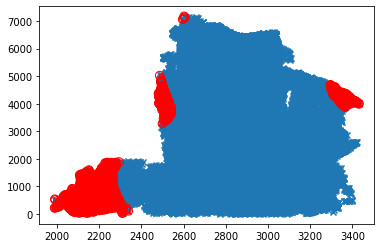

In [ ]:
xPart3rshapeAarray = np.array(xPart3rshape)
plt.scatter(xPart3rshapeAarray[:,0],xPart3rshapeAarray[:,1],cmap='viridis',marker='x')
threshold= bestTrPart3
outliers = np.nonzero(stPart3<threshold)[0]
plt.scatter(xPart3rshapeAarray[outliers,0],xPart3rshapeAarray[outliers,1],marker="o",facecolor= "none",edgecolor="r",s=70)

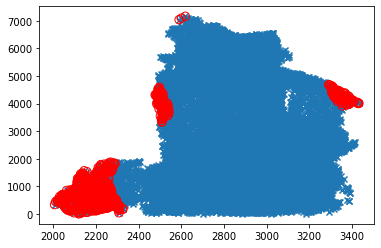

In [ ]:
xPart3rshapeAarrayV = np.array(xPart3rshapeV)
plt.scatter(xPart3rshapeAarrayV[:,0],xPart3rshapeAarrayV[:,1],cmap='viridis',marker='x')
threshold= bestTrPart3
outliers = np.nonzero(stPart3V<threshold)[0]
plt.scatter(xPart3rshapeAarrayV[outliers,0],xPart3rshapeAarrayV[outliers,1],marker="o",facecolor= "none",edgecolor="r",s=70)

## **Part 4:  Two Gaussian model with single feature. **
Now we will use two separate distributions for anomalous and non-anomalous forests.


    

In [ ]:
### YOUR CODE HERE ###
bestCListPart4= np.array([])
bestF1ListPart4 = np.array([])
prListPart4 = np.array([])
rcListPart4 = np.array([])
for f, feat2 in enumerate(features):
  g1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  g2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

  X_trainingPart4NoAnomalous = np.array([X_training[features[f]][y_training==0]])[0].reshape(-1,1)
  X_trainingPart4Anomalous = np.array([X_training[features[f]][y_training==1]])[0].reshape(-1,1)

  g1.fit(X_trainingPart4NoAnomalous)
  g2.fit(X_trainingPart4Anomalous)

  X_validationPart4 = np.array([X_validation[features[f]]])[0].reshape(-1,1)

  s1 = g1.score_samples(X_validationPart4)
  s2 = g2.score_samples(X_validationPart4)

  cListPart4 = np.array([])
  f1ListPart4 = np.array([])

  for i in range(0,100):
    c = i*0.1
    cListPart4 = np.append(cListPart4,c)
    f1Part4 = f1_score(y_validation, s1 < c*s2)
    f1ListPart4 = np.append(f1ListPart4,f1Part4)

  bestF1Part4 = np.max(f1ListPart4)
  bestF1ListPart4 = np.append(bestF1ListPart4,bestF1Part4)

  bestIndexPart4 = np.argwhere(f1ListPart4 == bestF1Part4)

  bestCPart4 = cListPart4[bestIndexPart4[0]]
  bestCListPart4 = np.append(bestCListPart4,bestCPart4)

  prPart4bV = precision_score(y_validation, s1 < bestCPart4*s2)
  prListPart4 = np.append(prListPart4,prPart4bV)

  rcPart4bV = recall_score(y_validation, s1 < bestCPart4*s2)
  rcListPart4 = np.append(rcListPart4,rcPart4bV)

dfPar4V = pd.DataFrame({'features_name': features,'C': bestCListPart4, 'F1': bestF1ListPart4, 'Precision': prListPart4, 'Recall': rcListPart4})

In [ ]:
dfPar4V.sort_values(by = 'F1', ascending = False)

,features_name,C,F1,Precision,Recall
0,Elevation,1.6,0.877670,0.821818,0.941667
8,Hillshade_3pm,1.3,0.126452,0.091589,0.204167
2,Slope,1.4,0.078445,0.051989,0.159722
6,Hillshade_9am,1.1,0.060764,0.032567,0.452778
5,Horizontal_Distance_To_Roadways,1.1,0.052841,0.027223,0.895833
9,Horizontal_Distance_To_Fire_Points,1.2,0.047491,0.025445,0.355556
3,Horizontal_Distance_To_Hydrology,1.1,0.042771,0.022077,0.683333
7,Hillshade_Noon,1.1,0.037074,0.020147,0.231944
4,Vertical_Distance_To_Hydrology,1.0,0.027839,0.014250,0.600000
1,Aspect,1.0,0.023698,0.012018,0.843056


In [ ]:
dfPar4V.sort_values(by = 'Precision', ascending = False)

,features_name,C,F1,Precision,Recall
0,Elevation,1.6,0.877670,0.821818,0.941667
8,Hillshade_3pm,1.3,0.126452,0.091589,0.204167
2,Slope,1.4,0.078445,0.051989,0.159722
6,Hillshade_9am,1.1,0.060764,0.032567,0.452778
5,Horizontal_Distance_To_Roadways,1.1,0.052841,0.027223,0.895833
9,Horizontal_Distance_To_Fire_Points,1.2,0.047491,0.025445,0.355556
3,Horizontal_Distance_To_Hydrology,1.1,0.042771,0.022077,0.683333
7,Hillshade_Noon,1.1,0.037074,0.020147,0.231944
4,Vertical_Distance_To_Hydrology,1.0,0.027839,0.014250,0.600000
1,Aspect,1.0,0.023698,0.012018,0.843056


In [ ]:
dfPar4V.sort_values(by = 'Recall', ascending = False)

,features_name,C,F1,Precision,Recall
0,Elevation,1.6,0.877670,0.821818,0.941667
5,Horizontal_Distance_To_Roadways,1.1,0.052841,0.027223,0.895833
1,Aspect,1.0,0.023698,0.012018,0.843056
3,Horizontal_Distance_To_Hydrology,1.1,0.042771,0.022077,0.683333
4,Vertical_Distance_To_Hydrology,1.0,0.027839,0.014250,0.600000
6,Hillshade_9am,1.1,0.060764,0.032567,0.452778
9,Horizontal_Distance_To_Fire_Points,1.2,0.047491,0.025445,0.355556
7,Hillshade_Noon,1.1,0.037074,0.020147,0.231944
8,Hillshade_3pm,1.3,0.126452,0.091589,0.204167
2,Slope,1.4,0.078445,0.051989,0.159722


In [ ]:
### YOUR CODE HERE ###
# for training set
bestCListPart4T = np.array([])
bestF1ListPart4T = np.array([])
prListPart4T = np.array([])
rcListPart4T = np.array([])
for f, feat2 in enumerate(features):
  g1T = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  g2T = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

  X_trainingPart4NoAnomalousT = np.array([X_training[features[f]][y_training==0]])[0].reshape(-1,1)
  X_trainingPart4AnomalousT = np.array([X_training[features[f]][y_training==1]])[0].reshape(-1,1)

  g1T.fit(X_trainingPart4NoAnomalousT)
  g2T.fit(X_trainingPart4AnomalousT)

  X_trainingPart4 = np.array([X_training[features[f]]])[0].reshape(-1,1)

  s1T = g1T.score_samples(X_trainingPart4)
  s2T = g2T.score_samples(X_trainingPart4)

  cListPart4T = np.array([])
  f1ListPart4T = np.array([])

  for i in range(0,100):
    c = i*0.1
    cListPart4T = np.append(cListPart4,c)
    f1Part4T = f1_score(y_training, s1T < c*s2T)
    f1ListPart4T = np.append(f1ListPart4T,f1Part4T)

  bestF1Part4T = np.max(f1ListPart4T)
  bestF1ListPart4T = np.append(bestF1ListPart4T,bestF1Part4T)

  bestIndexPart4T = np.argwhere(f1ListPart4T == bestF1Part4T)

  bestCPart4T = cListPart4T[bestIndexPart4T[0]]
  bestCListPart4T = np.append(bestCListPart4T,bestCPart4T)

  prPart4bT = precision_score(y_training, s1T < bestCPart4T*s2T)
  prListPart4T = np.append(prListPart4T,prPart4bT)

  rcPart4bT = recall_score(y_training, s1T < bestCPart4T*s2T)
  rcListPart4T = np.append(rcListPart4T,rcPart4bT)

dfPar4T = pd.DataFrame({'features name': features,'C': bestCListPart4T, 'F1': bestF1ListPart4T, 'Precision': prListPart4T, 'Recall': rcListPart4T})

In [ ]:
dfPar4V.sort_values(by = 'F1', ascending = False)

,features_name,C,F1,Precision,Recall
0,Elevation,1.6,0.877670,0.821818,0.941667
8,Hillshade_3pm,1.3,0.126452,0.091589,0.204167
2,Slope,1.4,0.078445,0.051989,0.159722
6,Hillshade_9am,1.1,0.060764,0.032567,0.452778
5,Horizontal_Distance_To_Roadways,1.1,0.052841,0.027223,0.895833
9,Horizontal_Distance_To_Fire_Points,1.2,0.047491,0.025445,0.355556
3,Horizontal_Distance_To_Hydrology,1.1,0.042771,0.022077,0.683333
7,Hillshade_Noon,1.1,0.037074,0.020147,0.231944
4,Vertical_Distance_To_Hydrology,1.0,0.027839,0.014250,0.600000
1,Aspect,1.0,0.023698,0.012018,0.843056


In [ ]:
dfPar4V.sort_values(by = 'Precision', ascending = False)

,features_name,C,F1,Precision,Recall
0,Elevation,1.6,0.877670,0.821818,0.941667
8,Hillshade_3pm,1.3,0.126452,0.091589,0.204167
2,Slope,1.4,0.078445,0.051989,0.159722
6,Hillshade_9am,1.1,0.060764,0.032567,0.452778
5,Horizontal_Distance_To_Roadways,1.1,0.052841,0.027223,0.895833
9,Horizontal_Distance_To_Fire_Points,1.2,0.047491,0.025445,0.355556
3,Horizontal_Distance_To_Hydrology,1.1,0.042771,0.022077,0.683333
7,Hillshade_Noon,1.1,0.037074,0.020147,0.231944
4,Vertical_Distance_To_Hydrology,1.0,0.027839,0.014250,0.600000
1,Aspect,1.0,0.023698,0.012018,0.843056


In [ ]:
dfPar4V.sort_values(by = 'Recall', ascending = False)

,features_name,C,F1,Precision,Recall
0,Elevation,1.6,0.877670,0.821818,0.941667
5,Horizontal_Distance_To_Roadways,1.1,0.052841,0.027223,0.895833
1,Aspect,1.0,0.023698,0.012018,0.843056
3,Horizontal_Distance_To_Hydrology,1.1,0.042771,0.022077,0.683333
4,Vertical_Distance_To_Hydrology,1.0,0.027839,0.014250,0.600000
6,Hillshade_9am,1.1,0.060764,0.032567,0.452778
9,Horizontal_Distance_To_Fire_Points,1.2,0.047491,0.025445,0.355556
7,Hillshade_Noon,1.1,0.037074,0.020147,0.231944
8,Hillshade_3pm,1.3,0.126452,0.091589,0.204167
2,Slope,1.4,0.078445,0.051989,0.159722


In [ ]:
bestF1Features = np.array(dfPar4V.sort_values(by = 'F1', ascending = False).features_name)
print(bestF1Features)

['Elevation' 'Hillshade_3pm' 'Slope' 'Hillshade_9am'
 'Horizontal_Distance_To_Roadways' 'Horizontal_Distance_To_Fire_Points'
 'Horizontal_Distance_To_Hydrology' 'Hillshade_Noon'
 'Vertical_Distance_To_Hydrology' 'Aspect']


## **Part 5: Multivariate and Mixture of Gaussians Distribution**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on non-anomalous forests or to both classes.

In [ ]:
X_trainingPart5 = np.array([X_training[features[1]][y_training==0]])[0].reshape(-1,1)
X_trainingPart51 = np.array([X_training[features[2]][y_training==0]])[0].reshape(-1,1)
xt = []
xt.append(X_trainingPart5)
xt.append(X_trainingPart51)
print(xt)
y = np.array(xt)
print(y.T)

In [ ]:
def Part5 (n, fea, ba):
  gm5 = GaussianMixture(n_components = n, covariance_type = 'full', random_state=0)

  xListPart5 = []
  xListPart5V = []
  xSTList = []
  xSVList = []
  for e in range(0,fea):
    X_trainingAllPart5 = np.array([X_training[bestF1Features[e]]])[0].reshape(-1,1)
    X_validationAllPart5 = np.array([X_validation[bestF1Features[e]]])[0].reshape(-1,1)
    xSTList.append(X_trainingAllPart5)
    xSVList.append(X_validationAllPart5)
  for i in range(0,fea):
    if ba == 0:
      X_trainingPart5 = np.array([X_training[bestF1Features[i]][y_training==0]])[0].reshape(-1,1)
      X_validationPart5 = np.array([X_validation[bestF1Features[i]][y_validation==0]])[0].reshape(-1,1)
    elif ba == 1:
      X_trainingPart5 = np.array([X_training[bestF1Features[i]][y_training==1]])[0].reshape(-1,1)
      X_validationPart5 = np.array([X_validation[bestF1Features[i]][y_validation==1]])[0].reshape(-1,1)
    elif ba == 2:
      X_trainingPart5 = np.array([X_training[bestF1Features[i]]])[0].reshape(-1,1)
      X_validationPart5 = np.array([X_validation[bestF1Features[i]]])[0].reshape(-1,1)
    else:
      X_trainingPart5 = np.array([X_training[bestF1Features[i]]])[0].reshape(-1,1)
      X_validationPart5 = np.array([X_validation[bestF1Features[i]]])[0].reshape(-1,1)
    xListPart5.append(X_trainingPart5)
    xListPart5V.append(X_validationPart5)
  temp = np.array(xListPart5)
  xReshapeT = temp.T
  temp1 = np.array(xListPart5V)
  xReshapeV = temp1.T
  temp2 = np.array(xSTList)
  xAllReshapeT = temp2.T
  temp3 = np.array(xSVList)
  xAllReshapeV = temp3.T

  gm5.fit(xReshapeT[0])
  sT5 = gm5.score_samples(xAllReshapeT[0])

  fpr_stPart5T, tpr_stPart5T, _ = roc_curve(y_training, -1 * sT5)
  aucPart5T = auc(fpr_stPart5T, tpr_stPart5T)

  trListPart5T = np.array([])
  f1ListPart5T = np.array([])

  for j in range(1,len(sT5),50):
    tr = sorted(sT5)[j] #We sort the points by probability
    trListPart5T = np.append(trListPart5T,tr)
    f1Part5 = f1_score(y_training, sT5 < tr)
    f1ListPart5T = np.append(f1ListPart5T,f1Part5)

  bestF1Part5T = np.max(f1ListPart5T)
  bestIndexPart5T = np.argwhere(f1ListPart5T == bestF1Part5T)
  bestTrPart5T = trListPart5T[bestIndexPart5T[0]]

  prPart5T = precision_score(y_training, sT5 < bestTrPart5T)

  rcPart5T = recall_score(y_training, sT5 < bestTrPart5T)


  gm5.fit(xReshapeV[0])
  sT5V = gm5.score_samples(xAllReshapeV[0])

  fpr_stPart5V, tpr_stPart5V, _ = roc_curve(y_validation, -1 * sT5V)
  aucPart5V = auc(fpr_stPart5V, tpr_stPart5V)

  trListPart5V = np.array([])
  f1ListPart5V = np.array([])

  for g in range(1,len(sT5V),50):
    tr = sorted(sT5V)[g] #We sort the points by probability
    trListPart5V = np.append(trListPart5V,tr)
    f1Part5V = f1_score(y_validation, sT5V < tr)
    f1ListPart5V = np.append(f1ListPart5V,f1Part5V)

  bestF1Part5V = np.max(f1ListPart5V)
  bestIndexPart5V = np.argwhere(f1ListPart5V == bestF1Part5V)
  bestTrPart5V = trListPart5V[bestIndexPart5V[0]]

  prPart5V = precision_score(y_validation, sT5V < bestTrPart5V)

  rcPart5V = recall_score(y_validation, sT5V < bestTrPart5V)

  return aucPart5T, aucPart5V, bestF1Part5T, bestF1Part5V, prPart5T, prPart5V, rcPart5T, rcPart5V

In [ ]:
# Mode1  1 components, 1 features, both class
aucPart5T, aucPart5V, bestF1Part5T, bestF1Part5V, prPart5T, prPart5V, rcPart5T, rcPart5V = Part5 (1, 1, 2)

# Mode2  10 components, 10 features, both class
aucPart5T0, aucPart5V0, bestF1Part5T0, bestF1Part5V0, prPart5T0, prPart5V0, rcPart5T0, rcPart5V0 = Part5 (1, 2, 2)

# Mode3  5 components, 10 features, both class
aucPart5T1, aucPart5V1, bestF1Part5T1, bestF1Part5V1, prPart5T1, prPart5V1, rcPart5T1, rcPart5V1 = Part5 (1, 3, 2)

# Mode4  10 components, 5 features, both class
aucPart5T2, aucPart5V2, bestF1Part5T2, bestF1Part5V2, prPart5T2, prPart5V2, rcPart5T2, rcPart5V2 = Part5 (2, 1, 2)

# Mode5  10 components, 10 features, non-anomalous forests
aucPart5T3, aucPart5V3, bestF1Part5T3, bestF1Part5V3, prPart5T3, prPart5V3, rcPart5T3, rcPart5V3 = Part5 (2, 2, 2)

# Mode6  5 components, 10 features, non-anomalous forests
aucPart5T4, aucPart5V4, bestF1Part5T4, bestF1Part5V4, prPart5T4, prPart5V4, rcPart5T4, rcPart5V4 = Part5 (3, 3, 2)

# Mode7  10 components, 5 features, non-anomalous forests
aucPart5T5, aucPart5V5, bestF1Part5T5, bestF1Part5V5, prPart5T5, prPart5V5, rcPart5T5, rcPart5V5 = Part5 (1, 1, 0)

# Mode8  10 components, 10 features, anomalous forests
aucPart5T6, aucPart5V6, bestF1Part5T6, bestF1Part5V6, prPart5T6, prPart5V6, rcPart5T6, rcPart5V6 = Part5 (1, 2, 0)

# Mode9  5 components, 10 features, anomalous forests
aucPart5T7, aucPart5V7, bestF1Part5T7, bestF1Part5V7, prPart5T7, prPart5V7, rcPart5T7, rcPart5V7 = Part5 (1, 3, 0)

# Mode10  10 components, 5 features, anomalous forests
aucPart5T8, aucPart5V8, bestF1Part5T8, bestF1Part5V8, prPart5T8, prPart5V8, rcPart5T8, rcPart5V8 = Part5 (2, 1, 0)

comList = [1,1,1,2,2,3,1,1,1,2]
feaList = [1,2,3,1,2,3,1,2,3,1]
classList = ['both','both','both','both','both','both','non-anomalous','non-anomalous','non-anomalous','non-anomalous']
aucList5T = []
aucList5V = []
f1List5T = []
f1List5V = []
prList5T = []
prList5V = []
rcList5T = []
rcList5V = []

aucList5T.append(aucPart5T)
aucList5T.append(aucPart5T0)
aucList5T.append(aucPart5T1)
aucList5T.append(aucPart5T2)
aucList5T.append(aucPart5T3)
aucList5T.append(aucPart5T4)
aucList5T.append(aucPart5T5)
aucList5T.append(aucPart5T6)
aucList5T.append(aucPart5T7)
aucList5T.append(aucPart5T8)

aucList5V.append(aucPart5V)
aucList5V.append(aucPart5V0)
aucList5V.append(aucPart5V1)
aucList5V.append(aucPart5V2)
aucList5V.append(aucPart5V3)
aucList5V.append(aucPart5V4)
aucList5V.append(aucPart5V5)
aucList5V.append(aucPart5V6)
aucList5V.append(aucPart5V7)
aucList5V.append(aucPart5V8)

f1List5T.append(bestF1Part5T)
f1List5T.append(bestF1Part5T0)
f1List5T.append(bestF1Part5T1)
f1List5T.append(bestF1Part5T2)
f1List5T.append(bestF1Part5T3)
f1List5T.append(bestF1Part5T4)
f1List5T.append(bestF1Part5T5)
f1List5T.append(bestF1Part5T6)
f1List5T.append(bestF1Part5T7)
f1List5T.append(bestF1Part5T8)

f1List5V.append(bestF1Part5V)
f1List5V.append(bestF1Part5V0)
f1List5V.append(bestF1Part5V1)
f1List5V.append(bestF1Part5V2)
f1List5V.append(bestF1Part5V3)
f1List5V.append(bestF1Part5V4)
f1List5V.append(bestF1Part5V5)
f1List5V.append(bestF1Part5V6)
f1List5V.append(bestF1Part5V7)
f1List5V.append(bestF1Part5V8)

prList5T.append(prPart5T)
prList5T.append(prPart5T0)
prList5T.append(prPart5T1)
prList5T.append(prPart5T2)
prList5T.append(prPart5T3)
prList5T.append(prPart5T4)
prList5T.append(prPart5T5)
prList5T.append(prPart5T6)
prList5T.append(prPart5T7)
prList5T.append(prPart5T8)

prList5V.append(prPart5T)
prList5V.append(prPart5T0)
prList5V.append(prPart5T1)
prList5V.append(prPart5T2)
prList5V.append(prPart5T3)
prList5V.append(prPart5T4)
prList5V.append(prPart5T5)
prList5V.append(prPart5T6)
prList5V.append(prPart5T7)
prList5V.append(prPart5T8)

rcList5T.append(rcPart5T)
rcList5T.append(rcPart5T0)
rcList5T.append(rcPart5T1)
rcList5T.append(rcPart5T2)
rcList5T.append(rcPart5T3)
rcList5T.append(rcPart5T4)
rcList5T.append(rcPart5T5)
rcList5T.append(rcPart5T6)
rcList5T.append(rcPart5T7)
rcList5T.append(rcPart5T8)

rcList5V.append(rcPart5V)
rcList5V.append(rcPart5V0)
rcList5V.append(rcPart5V1)
rcList5V.append(rcPart5V2)
rcList5V.append(rcPart5V3)
rcList5V.append(rcPart5V4)
rcList5V.append(rcPart5V5)
rcList5V.append(rcPart5V6)
rcList5V.append(rcPart5V7)
rcList5V.append(rcPart5V8)

dfPart5 = pd.DataFrame({'Number_of_component': comList,'Number_of_features': feaList, 'Forest_type': classList, 'Training_set_AUC': aucList5T, 'Validation_set_AUC': aucList5V, 'Training_set_F1': f1List5T, 'Validation_set_F1': f1List5V, 'Training_set_Precision': prList5T, 'Validation_set_Precision': prList5V, 'Training_set_Recall': rcList5T, 'Validation_set_Recall': rcList5V})

In [ ]:
dfPart5

,Number_of_component,Number_of_features,Forest_type,Training_set_AUC,Validation_set_AUC,Training_set_F1,Validation_set_F1,Training_set_Precision,Validation_set_Precision,Training_set_Recall,Validation_set_Recall
0,1,1,both,0.999367,0.999234,0.885293,0.877148,0.828556,0.828556,0.950372,0.956944
1,1,5,both,0.995757,0.995530,0.668538,0.669297,0.610456,0.610456,0.738834,0.706944
2,5,1,both,0.984307,0.983992,0.392286,0.391715,0.303287,0.303287,0.555211,0.604167
3,5,5,both,0.998981,0.998872,0.830357,0.836627,0.798055,0.798055,0.865385,0.881944
4,1,1,non-anomalous,0.993807,0.993663,0.638696,0.636302,0.621987,0.621987,0.656328,0.650000
5,5,1,non-anomalous,0.986503,0.983605,0.525360,0.437341,0.442790,0.442790,0.645782,0.598611
6,1,5,non-anomalous,0.999377,0.999249,0.885293,0.877148,0.828556,0.828556,0.950372,0.956944
7,1,1,anomalous,0.996910,0.996706,0.705949,0.706566,0.652288,0.652288,0.769231,0.844444
8,5,1,anomalous,0.987901,0.987568,0.446940,0.441400,0.354417,0.354417,0.604839,0.604167
9,1,5,anomalous,0.999310,0.999168,0.878992,0.872200,0.832871,0.832871,0.930521,0.919444


## **Part 6: Evaluating performance on test set:**

In [ ]:
g1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
g2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

X_test, y_test

X_testPart6NoAnomalous = np.array([X_test['Elevation'][y_test==0]])[0].reshape(-1,1)
X_testPart6Anomalous = np.array([X_test['Elevation'][y_test==1]])[0].reshape(-1,1)

g1.fit(X_testPart6NoAnomalous)
g2.fit(X_testPart6Anomalous)

X_testPart6 = np.array([X_test['Elevation']])[0].reshape(-1,1)

s1p6 = g1.score_samples(X_testPart6)
s2p6 = g2.score_samples(X_testPart6)

cListPart6 = np.array([])
f1ListPart6 = np.array([])

for i in range(0,100):
  cp6 = i*0.1
  cListPart6 = np.append(cListPart6,cp6)
  f1Part6 = f1_score(y_test, s1p6 < cp6*s2p6)
  f1ListPart6 = np.append(f1ListPart6,f1Part6)

bestF1Part6 = np.max(f1ListPart6)

bestIndexPart6 = np.argwhere(f1ListPart6 == bestF1Part6)

bestCPart6 = cListPart6[bestIndexPart6[0]]


prPart6 = precision_score(y_test, s1p6 < bestCPart6*s2p6)

rcPart6 = recall_score(y_test, s1p6 < bestCPart6*s2p6)

print("Feature: Elevation")
print("Best threshold:",bestCPart6)
print("F1 score:",bestF1Part6)
print("Precision score:",prPart6)
print("Recall score:",rcPart6)

Feature: Elevation
Best threshold: [1.5]
F1 score: 0.8896321070234113
Precision score: 0.8278008298755186
Recall score: 0.9614457831325302


## **Bonus Part: Using the Precision Recall Curve:**
Repeat Part 2 using the Precision Recall Curve instead of the ROC curve.

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
### YOUR CODE HERE ###
trainingAUCBonus = np.array([])
validationAUCBonus = np.array([])
for f, feat1 in enumerate(features):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

  X_trainingCurrentBonus = np.array([X_training[features[f]]])[0].reshape(-1,1)
  gm.fit(X_trainingCurrentBonus)
  stBonus = gm.score_samples(X_trainingCurrentBonus)

  precisionBonus, recallBonus, thresholdsBonus = precision_recall_curve(y_training, -1 * stBonus)

  aucStBonus = auc(recallBonus, precisionBonus)
  trainingAUCBonus = np.append(trainingAUCBonus,aucStBonus)

  X_validationCurrentBonus = np.array([X_validation[features[f]]])[0].reshape(-1,1)
  gm.fit(X_validationCurrentBonus)
  svBonus = gm.score_samples(X_validationCurrentBonus)

  precisionBonusV, recallBonusV, thresholdsBonusV = precision_recall_curve(y_validation, -1 * svBonus)
  aucBonusV = auc(recallBonusV, precisionBonusV)
  validationAUCBonus = np.append(validationAUCBonus,aucBonusV)

In [ ]:
dfBestAUCBonus = pd.DataFrame({'features_name': features,'trainingAUC': trainingAUCBonus, 'validationAUC': validationAUCBonus})

In [ ]:
dfBestAUCBonus.sort_values(by = 'validationAUC', ascending = False)

,features_name,trainingAUC,validationAUC
0,Elevation,0.929832,0.917302
8,Hillshade_3pm,0.040980,0.038555
2,Slope,0.022473,0.024995
6,Hillshade_9am,0.016000,0.015415
3,Horizontal_Distance_To_Hydrology,0.015549,0.015304
9,Horizontal_Distance_To_Fire_Points,0.013984,0.013738
7,Hillshade_Noon,0.013137,0.013583
4,Vertical_Distance_To_Hydrology,0.013458,0.013159
5,Horizontal_Distance_To_Roadways,0.010954,0.011243
1,Aspect,0.007281,0.006957


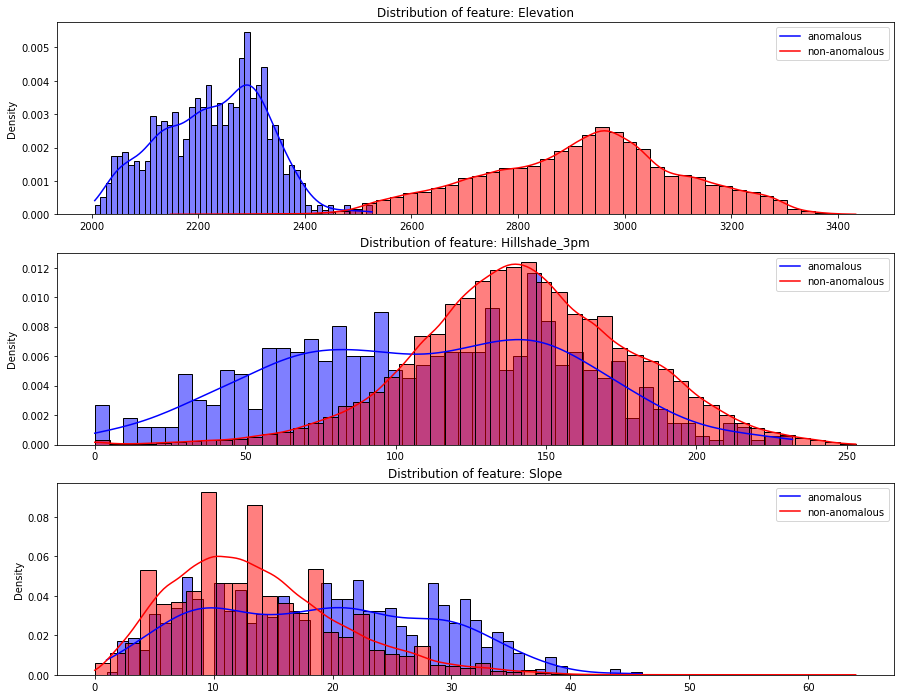

In [ ]:
bestThreeFeatureListBonus = ['Elevation','Hillshade_3pm','Slope']
nplots=np.size(bestThreeFeatureListBonus)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(bestThreeFeatureListBonus):
    ax = plt.subplot(gs[i])
    sns.histplot(X_validation[feat][y_validation==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_validation[feat][y_validation==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['anomalous', 'non-anomalous'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

In [ ]:
bestTrListBonus = np.array([])
bestF1ListBonus = np.array([])
bestThreeFeatureListBonus = ['Elevation','Hillshade_3pm','Slope']
for g, btf in enumerate(bestThreeFeatureListBonus):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  X_validationBTFBonus = np.array([X_validation[bestThreeFeatureListBonus[g]]])[0].reshape(-1,1)
  gm.fit(X_validationBTFBonus)
  btfsvBonus = gm.score_samples(X_validationBTFBonus)
  trListBonus = np.array([])
  f1ListBonus = np.array([])

  precisionBonus1, recallBonus1, thresholdsBonus1 = precision_recall_curve(y_validation, -1 * btfsvBonus)

  f1ListBonus1 = (2*np.array(precisionBonus1)*np.array(recallBonus1))/(np.array(precisionBonus1)+np.array(recallBonus1))
  for g in range(len(f1ListBonus1)):
    if np.isnan(f1ListBonus1[g]):
      f1ListBonus1[g] = 0

  bestF1tempBonus1 = np.max(f1ListBonus1)
  bestIndexBonus1 = np.argwhere(f1ListBonus1 == bestF1tempBonus1)
  bestTrBonus1 = thresholdsBonus1[bestIndexBonus1[0]]

  bestTrListBonus = np.append(bestTrListBonus,bestTrBonus1)
  bestF1ListBonus = np.append(bestF1ListBonus,bestF1tempBonus1)
  print("Feature:",btf)
  print("Best threshold:",bestTrBonus1)
  print("Best f1 score:",bestF1tempBonus1)
  print("=========")
print(bestTrListBonus)

Feature: Elevation
Best threshold: [9.89290841]
Best f1 score: 0.8814862267777065
Feature: Hillshade_3pm
Best threshold: [7.96241693]
Best f1 score: 0.10259579728059333
Feature: Slope
Best threshold: [4.93022684]
Best f1 score: 0.0834368015892724
[9.89290841 7.96241693 4.93022684]


<ipython-input-80-3056ddd6314a>:14: RuntimeWarning: invalid value encountered in true_divide
  f1ListBonus1 = (2*np.array(precisionBonus1)*np.array(recallBonus1))/(np.array(precisionBonus1)+np.array(recallBonus1))


In [ ]:
print('Training Set')
reportListf1Bonus = []
reportListprBonus = []
reportListrcBonus = []

for p, btf1 in enumerate(bestThreeFeatureListBonus):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  X_trainingBTF1Bonus = np.array([X_training[bestThreeFeatureListBonus[p]]])[0].reshape(-1,1)
  gm.fit(X_trainingBTF1Bonus)
  btfst1Bonus = gm.score_samples(X_trainingBTF1Bonus)
  prtBonus = precision_score(y_training, btfst1Bonus < -1*bestTrListBonus[p])
  rctBonus = recall_score(y_training, btfst1Bonus < -1*bestTrListBonus[p])
  f1tBonus = f1_score(y_training, btfst1Bonus < -1*bestTrListBonus[p])
  reportListf1Bonus.append(f1tBonus)
  reportListprBonus.append(prtBonus)
  reportListrcBonus.append(rctBonus)

dfReportTBonus = pd.DataFrame({'features_name': bestThreeFeatureListBonus,'Best threshold': bestTrListBonus,'F1': reportListf1Bonus, 'Precision': reportListprBonus, 'Recall': reportListrcBonus})

Training Set


In [ ]:
dfReportTBonus

,features_name,Best threshold,F1,Precision,Recall
0,Elevation,9.892908,0.884671,0.824665,0.954094
1,Hillshade_3pm,7.962417,0.090985,0.082699,0.101117
2,Slope,4.930227,0.064073,0.040294,0.156328


In [ ]:
reportListf1VBonus = []
reportListprVBonus = []
reportListrcVBonus = []

print('Validation Set')
for p, btf1 in enumerate(bestThreeFeatureListBonus):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  X_validationBTF1Bonus = np.array([X_validation[bestThreeFeatureListBonus[p]]])[0].reshape(-1,1)
  gm.fit(X_validationBTF1Bonus)
  btfsv1Bonus = gm.score_samples(X_validationBTF1Bonus)
  prvBonus = precision_score(y_validation, btfsv1Bonus < -1*bestTrListBonus[p])
  rcvBonus = recall_score(y_validation, btfsv1Bonus < -1*bestTrListBonus[p])
  f1vBonus = f1_score(y_validation, btfsv1Bonus < -1*bestTrListBonus[p])
  reportListf1VBonus.append(f1vBonus)
  reportListprVBonus.append(prvBonus)
  reportListrcVBonus.append(rcvBonus)

dfReportVBonus = pd.DataFrame({'features_name': bestThreeFeatureListBonus,'Best threshold': bestTrListBonus,'F1': reportListf1VBonus, 'Precision': reportListprVBonus, 'Recall': reportListrcVBonus})

Validation Set


In [ ]:
dfReportVBonus

,features_name,Best threshold,F1,Precision,Recall
0,Elevation,9.892908,0.877892,0.816986,0.948611
1,Hillshade_3pm,7.962417,0.099309,0.090700,0.109722
2,Slope,4.930227,0.080867,0.051244,0.191667


In [ ]:
# Training set
bestTrListPart2bBonus = np.array([])
bestF1ListPart2bBonus = np.array([])
aucListPart2bBonus = np.array([])
prListPart2bBonus = np.array([])
rcListPart2bBonus = np.array([])

xPart2bTBothClassBonus = []
xPart2bT1BothClassBonus = np.array(X_training['Elevation']).reshape(-1,1)
xPart2bT2BothClassBonus = np.array(X_training['Hillshade_3pm']).reshape(-1,1)
xPart2bT3BothClassBonus = np.array(X_training['Slope']).reshape(-1,1)
xPart2bTBothClassBonus.append(xPart2bT1BothClassBonus)
xPart2bTBothClassBonus.append(xPart2bT2BothClassBonus)
xPart2bTBothClassBonus.append(xPart2bT3BothClassBonus)


xPart2bTNoAnomalousBonus = []
xPart2bT1NoAnomalousBonus = np.array(X_training['Elevation'][y_training==0]).reshape(-1,1)
xPart2bT2NoAnomalousBonus = np.array(X_training['Hillshade_3pm'][y_training==0]).reshape(-1,1)
xPart2bT3NoAnomalousBonus = np.array(X_training['Slope'][y_training==0]).reshape(-1,1)
xPart2bTNoAnomalousBonus.append(xPart2bT1NoAnomalousBonus)
xPart2bTNoAnomalousBonus.append(xPart2bT2NoAnomalousBonus)
xPart2bTNoAnomalousBonus.append(xPart2bT3NoAnomalousBonus)

for i in range(len(xPart2bTNoAnomalousBonus)):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  gm.fit(xPart2bTNoAnomalousBonus[i])
  stPart2bTBonus = gm.score_samples(xPart2bTBothClassBonus[i])

  precision2bTBonus, recall2bTBonus, thresholds2bTBonus = precision_recall_curve(y_training, -1 * stPart2bTBonus)

  aucStPart2bTBonus = auc(recall2bTBonus, precision2bTBonus)
  aucListPart2bBonus = np.append(aucListPart2bBonus,aucStPart2bTBonus)

  f1ListPart2bBonus = (2*np.array(precision2bTBonus)*np.array(recall2bTBonus))/(np.array(precision2bTBonus)+np.array(recall2bTBonus))
  for g in range(len(f1ListPart2bBonus)):
    if np.isnan(f1ListPart2bBonus[g]):
      f1ListPart2bBonus[g] = 0

  bestF1Part2btempBonus = np.max(f1ListPart2bBonus)
  bestIndexPart2bBonus = np.argwhere(f1ListPart2bBonus == bestF1Part2btempBonus)
  bestTrPart2bBonus = thresholds2bTBonus[bestIndexPart2bBonus[0]]


  bestTrListPart2bBonus = np.append(bestTrListPart2bBonus,bestTrPart2bBonus)
  bestF1ListPart2bBonus = np.append(bestF1ListPart2bBonus,bestF1Part2btempBonus)

  prListPart2bBonus = np.append(prListPart2bBonus,precision2bTBonus[bestIndexPart2bBonus])
  rcListPart2bBonus = np.append(rcListPart2bBonus,recall2bTBonus[bestIndexPart2bBonus])


dfReport2bTBonus = pd.DataFrame({'features_name': bestThreeFeatureListBonus,'AUC': aucListPart2bBonus,'Best threshold': bestTrListPart2bBonus,'F1': bestF1ListPart2bBonus, 'Precision': prListPart2bBonus, 'Recall': rcListPart2bBonus})


<ipython-input-88-c0f0a2385899>:35: RuntimeWarning: invalid value encountered in true_divide
  f1ListPart2bBonus = (2*np.array(precision2bTBonus)*np.array(recall2bTBonus))/(np.array(precision2bTBonus)+np.array(recall2bTBonus))


In [ ]:
dfReport2bTBonus

,features_name,AUC,Best threshold,F1,Precision,Recall
0,Elevation,0.930171,10.453680,0.885293,0.828556,0.950372
1,Hillshade_3pm,0.041421,8.236819,0.096725,0.095468,0.098015
2,Slope,0.022473,5.896273,0.066865,0.046574,0.118486


In [ ]:
# Validation set
bestTrListPart2bVBonus = np.array([])
bestF1ListPart2bVBonus = np.array([])
aucListPart2bVBonus = np.array([])
prListPart2bVBonus = np.array([])
rcListPart2bVBonus = np.array([])

xPart2bVBothClassBonus = []
xPart2bV1BothClassBonus = np.array(X_validation['Elevation']).reshape(-1,1)
xPart2bV2BothClassBonus = np.array(X_validation['Hillshade_3pm']).reshape(-1,1)
xPart2bV3BothClassBonus = np.array(X_validation['Slope']).reshape(-1,1)
xPart2bVBothClassBonus.append(xPart2bV1BothClassBonus)
xPart2bVBothClassBonus.append(xPart2bV2BothClassBonus)
xPart2bVBothClassBonus.append(xPart2bV3BothClassBonus)


xPart2bVNoAnomalousBonus = []
xPart2bV1NoAnomalousBonus = np.array(X_validation['Elevation'][y_validation==0]).reshape(-1,1)
xPart2bV2NoAnomalousBonus = np.array(X_validation['Hillshade_3pm'][y_validation==0]).reshape(-1,1)
xPart2bV3NoAnomalousBonus = np.array(X_validation['Slope'][y_validation==0]).reshape(-1,1)
xPart2bVNoAnomalousBonus.append(xPart2bV1NoAnomalousBonus)
xPart2bVNoAnomalousBonus.append(xPart2bV2NoAnomalousBonus)
xPart2bVNoAnomalousBonus.append(xPart2bV3NoAnomalousBonus)

for i in range(len(xPart2bTNoAnomalousBonus)):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  gm.fit(xPart2bVNoAnomalousBonus[i])
  stPart2bVBonus = gm.score_samples(xPart2bVBothClass[i])

  precision2bVBonus, recall2bVBonus, thresholds2bVBonus = precision_recall_curve(y_validation, -1 * stPart2bVBonus)

  aucStPart2bVBonus = auc(recall2bVBonus, precision2bVBonus)
  aucListPart2bVBonus = np.append(aucListPart2bVBonus,aucStPart2bVBonus)

  f1ListPart2bBonusV = (2*np.array(precision2bVBonus)*np.array(recall2bVBonus))/(np.array(precision2bVBonus)+np.array(recall2bVBonus))
  for g in range(len(f1ListPart2bBonusV)):
    if np.isnan(f1ListPart2bBonusV[g]):
      f1ListPart2bBonusV[g] = 0

  bestF1Part2btempBonusV = np.max(f1ListPart2bBonusV)
  bestIndexPart2bBonusV = np.argwhere(f1ListPart2bBonusV == bestF1Part2btempBonusV)
  bestTrPart2bBonusV = thresholds2bVBonus[bestIndexPart2bBonusV[0]]


  bestTrListPart2bVBonus = np.append(bestTrListPart2bVBonus,bestTrPart2bBonusV)
  bestF1ListPart2bVBonus = np.append(bestF1ListPart2bVBonus,bestF1Part2btempBonusV)

  prListPart2bVBonus = np.append(prListPart2bVBonus,precision2bVBonus[bestIndexPart2bBonusV])
  rcListPart2bVBonus = np.append(rcListPart2bVBonus,recall2bVBonus[bestIndexPart2bBonusV])


dfReport2bVBonus = pd.DataFrame({'features_name': bestThreeFeatureList,'AUC': aucListPart2bVBonus,'Best threshold': bestTrListPart2bVBonus,'F1': bestF1ListPart2bVBonus, 'Precision': prListPart2bVBonus, 'Recall': rcListPart2bVBonus})


<ipython-input-90-0bc2c77d7b5e>:35: RuntimeWarning: invalid value encountered in true_divide
  f1ListPart2bBonusV = (2*np.array(precision2bVBonus)*np.array(recall2bVBonus))/(np.array(precision2bVBonus)+np.array(recall2bVBonus))
<ipython-input-90-0bc2c77d7b5e>:35: RuntimeWarning: invalid value encountered in true_divide
  f1ListPart2bBonusV = (2*np.array(precision2bVBonus)*np.array(recall2bVBonus))/(np.array(precision2bVBonus)+np.array(recall2bVBonus))


In [ ]:
dfReport2bVBonus

,features_name,AUC,Best threshold,F1,Precision,Recall
0,Elevation,0.917612,10.394787,0.881486,0.818074,0.955556
1,Horizontal_Distance_To_Fire_Points,0.005373,4.524374,0.019065,0.009624,1.000000
2,Hillshade_3pm,0.006384,2.878453,0.019065,0.009624,1.000000
